# Exploratory Data Analysis - CARMA Data

This loads the class `DataHandler` which is a class that should be able to process data comming either from `PoC` or `CARMA`

In [1]:
from collector.handler import DataHandler

In particular we consider one of the `CARMA` datasets

In [2]:
# csv path 
csvpath = 'data/raw/carma/data5.csv'
experiment = DataHandler(csvpath)

After passing the path towards the file we execute the method `compute_response_times` which is responsible for loading, cleaning, and computing the corresponding times 

In [3]:
experiment.data

,Time,leader_GPS_CARMA_speed,follower1_GPS_CARMA_speed,follower1_radar1,follower2_GPS_CARMA_speed,follower2_radar1,follower3_GPS_CARMA_speed,follower3_radar1,follower4_GPS_CARMA_speed,follower4_radar1
0,0.0,NaN,6.373,17.875,NaN,20.00,12.508,20.000,15.087,70.375
1,0.1,NaN,6.197,17.375,NaN,19.50,12.330,19.875,15.043,70.375
2,0.2,NaN,6.035,17.125,NaN,19.25,12.171,19.625,15.002,70.375
3,0.3,NaN,5.885,16.750,NaN,18.75,12.030,19.500,14.962,70.500
4,0.4,NaN,5.726,16.500,NaN,18.50,11.916,19.250,14.934,70.500
...,...,...,...,...,...,...,...,...,...,...
3995,399.5,26.842,26.782,29.375,26.824,28.25,26.736,28.875,26.736,27.625
3996,399.6,26.848,26.789,29.375,26.830,28.25,26.738,28.750,26.738,27.625
3997,399.7,26.840,26.782,29.375,26.830,28.25,26.741,28.750,26.749,27.625
3998,399.8,26.842,26.795,29.375,26.835,28.25,26.740,28.750,26.746,27.625


In [4]:
experiment.compute_response_times()

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data5


In [5]:
experiment.data

,Time,Speed - 0,Speed - 1,follower1_radar1,Speed - 2,follower2_radar1,Speed - 3,follower3_radar1,Speed - 4,follower4_radar1,...,0_Change,1_Change,2_Change,3_Change,4_Change,0_Detection,1_Detection,2_Detection,3_Detection,4_Detection
0,0.0,NaN,6.373,17.875,NaN,20.00,12.508,20.000,15.087,70.375,...,False,False,False,False,False,False,False,False,False,False
1,0.1,NaN,6.197,17.375,NaN,19.50,12.330,19.875,15.043,70.375,...,False,True,False,True,True,False,False,False,False,False
2,0.2,NaN,6.035,17.125,NaN,19.25,12.171,19.625,15.002,70.375,...,False,True,False,True,True,False,False,False,False,False
3,0.3,NaN,5.885,16.750,NaN,18.75,12.030,19.500,14.962,70.500,...,False,True,False,True,True,False,False,False,False,False
4,0.4,NaN,5.726,16.500,NaN,18.50,11.916,19.250,14.934,70.500,...,False,True,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,399.5,26.842,26.782,29.375,26.824,28.25,26.736,28.875,26.736,27.625,...,False,False,False,False,False,False,False,False,False,False
3996,399.6,26.848,26.789,29.375,26.830,28.25,26.738,28.750,26.738,27.625,...,False,False,False,False,False,False,False,False,False,False
3997,399.7,26.840,26.782,29.375,26.830,28.25,26.741,28.750,26.749,27.625,...,False,False,False,False,False,False,False,False,False,False
3998,399.8,26.842,26.795,29.375,26.835,28.25,26.740,28.750,26.746,27.625,...,False,False,False,False,False,False,False,False,False,False


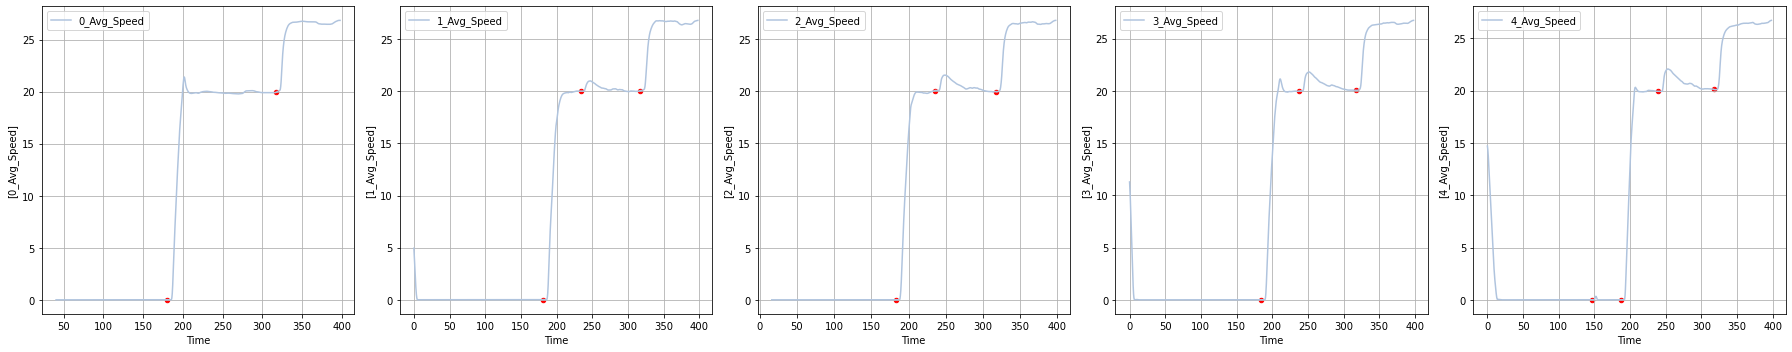

In [6]:
experiment.plot_speed_timedetections()

In [7]:
experiment._transitiontimes

,vehid,value
0,0,180.3
1,0,317.1
17,1,181.0
18,1,233.7
19,1,317.5
35,2,182.7
36,2,235.9
37,2,317.4
53,3,184.6
54,3,237.9


In [8]:
# Time between vehicle i-1 and vehicle i
experiment._compute_leader_follower_times()

,1,2,3,4
0,0.7,NaN,NaN,NaN
1,NaN,1.7,NaN,NaN
2,NaN,NaN,1.9,NaN
3,NaN,NaN,NaN,2.1


In [9]:
# Time between vehicle 1 and vehicle i
experiment._compute_head_follower_times()

,1,2,3,4
0,0.7,NaN,NaN,NaN
1,NaN,2.4,NaN,NaN
2,NaN,NaN,4.3,NaN
3,NaN,NaN,NaN,6.4


## Explore the whole amount of files 

In this case we are going to process all data from `CARMA`

In [10]:
from glob import glob

filenames = glob('data/raw/carma/*.csv')
filenames

['data/raw/carma/data5.csv',
 'data/raw/carma/data6.csv',
 'data/raw/carma/data9.csv',
 'data/raw/carma/data12.csv',
 'data/raw/carma/data13.csv',
 'data/raw/carma/data10.csv']

In [11]:
experiments = [DataHandler(file) for file in filenames]

We can now compute the transition times, detection of response times in each vehicle

In [12]:
[e.compute_response_times() for e in experiments];

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data5
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data6
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data9
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data12
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data13
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data10


Let's compute the leader follower response times 

In [13]:
import pandas as pd

rtlf= [lf._compute_leader_follower_times() for lf in experiments]
rtlf = pd.concat(rtlf)

This represents the response time between the leader `i-1` and the follower `i`

In [14]:
rtlf.head()

,1,2,3,4
0,0.7,NaN,NaN,NaN
1,NaN,1.7,NaN,NaN
2,NaN,NaN,1.9,NaN
3,NaN,NaN,NaN,2.1
0,0.3,NaN,NaN,NaN


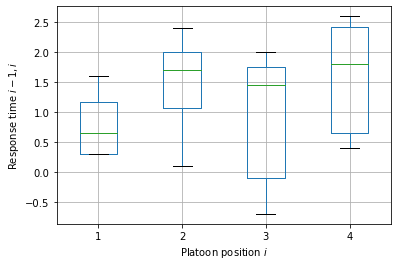

In [15]:
a = rtlf.boxplot();
a.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $i-1,i$');

In [16]:
rt0f= [lf._compute_head_follower_times() for lf in experiments]
rt0f = pd.concat(rt0f)

This represents the time between vehicle `0` and vehicle `i`

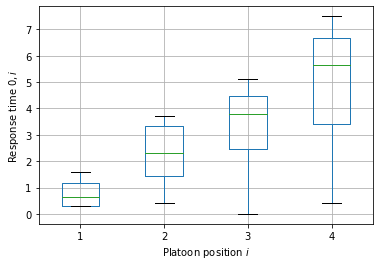

In [17]:
a = rt0f.boxplot();
a.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $0,i$');

A. Ladino